# Задание по визуализации

Ссылка на данные: https://drive.google.com/drive/folders/1by7kkSwB-uMgIKKwEU-U_i81MnxMR4oM?usp=sharing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Вариант 1

**Задания:**
1. Постройте Диаграмму разброса (точечный график) от двух переменных: `Vmag` и `e_Plx`.
2. Построить график анализа пропущенных значений.
3. Построить boxplot для всех числовых переменных. График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).
4. Построить barplot по переменной `TargetClass`.
5. Построить матрицу корреляции для всех переменных.
6. Построить графики парных зависимостей между всеми числовыми переменными (если много переменных, возьмите только часть).
7. Построить график распределения любой переменной.

*P.s. Все графики, оси и переменные должны быть подписаны. И по графикам необходимо сделать выводы.*

**Датасет для задания называется train_var_1.csv**

In [3]:
df = pd.read_csv("train_var_1.csv")
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,6.901420,24.569658,0.862829,0.737416,G5V,20.449126,1
1,4.334196,2.198947,0.593309,1.153210,G2Ib,13.043324,0
2,7.873019,11.750465,0.616568,0.589166,F5V,17.736492,1
3,8.110014,2.143815,0.848508,1.322107,K2III,15.592469,0
4,8.025193,4.165622,0.899296,1.141646,K5III,16.379680,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31641 entries, 0 to 31640
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         31641 non-null  float64
 1   Plx          31641 non-null  float64
 2   e_Plx        31641 non-null  float64
 3   B-V          31641 non-null  float64
 4   SpType       31641 non-null  object 
 5   Amag         31641 non-null  float64
 6   TargetClass  31641 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.7+ MB


### Построение диаграммы разброса

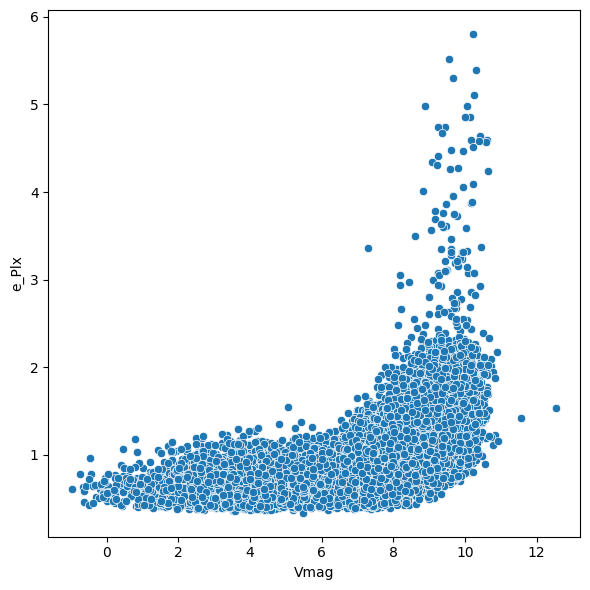

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(data=df, x="Vmag", y="e_Plx", ax = ax)

fig.tight_layout()

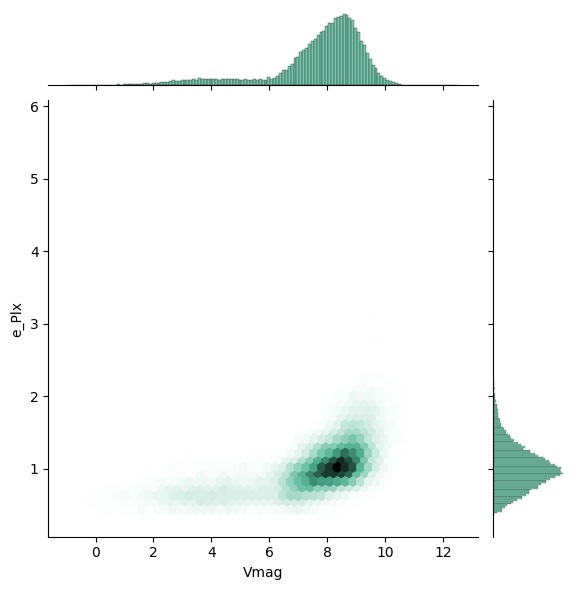

In [ ]:
jg = sns.jointplot(data=df, x="Vmag", y="e_Plx", kind="hex", color="#4CB391", )

# fig = jg.figure

# fig.tight_layout()

### График анализа пропущенных значений

In [19]:
df.isnull().mean()

Vmag           0.0
Plx            0.0
e_Plx          0.0
B-V            0.0
SpType         0.0
Amag           0.0
TargetClass    0.0
dtype: float64

<Axes: >

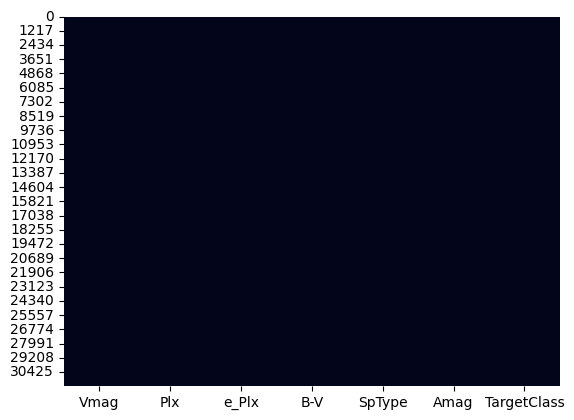

In [14]:
sns.heatmap(df.isnull(), cbar=False)

### boxplot для всех числовых переменных

In [ ]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,31641.000000,31641.000000,31641.000000,31641.000000,31641.000000,31641.000000
mean,7.657008,6.060009,1.030286,0.712615,16.053552,0.499321
std,1.743426,6.336226,0.348017,0.474148,2.349601,0.500007
min,-0.960192,-24.900856,0.336300,-0.409355,4.157485,0.000000
25%,7.181646,2.184676,0.809005,0.342697,14.749502,0.000000
50%,8.108187,4.047433,0.992616,0.712378,16.130040,0.000000
75%,8.772251,7.948651,1.195221,1.090438,17.486865,1.000000
max,12.537229,86.048127,5.805426,2.866545,27.222762,1.000000


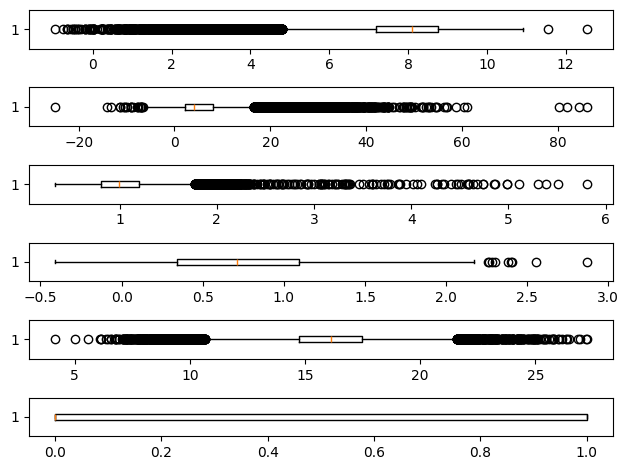

In [28]:
fig, ax = plt.subplots(6, 1)

for k, var in enumerate(['Vmag', 'Plx', 'e_Plx', 'B-V', 'Amag', 'TargetClass']):
    ax[k].boxplot(df[var], vert=False)

# ax[0].boxplot(df["Vmag"], vert=False)
# ax[1].boxplot(df["Plx"], vert=False)
# ax[2].boxplot(df["e_Plx"], vert=False)
# ax[3].boxplot(df["B-V"], vert=False)
# ax[4].boxplot(df["Amag"], vert=False)
# ax[5].boxplot(df["TargetClass"], vert=False)

fig.tight_layout()

Логично, что `df["TargetClass"]` класса **bool** не будет иметь исключений, при нормальном распределении.

### barplot

TargetClass
0    15842
1    15799
Name: count, dtype: int64

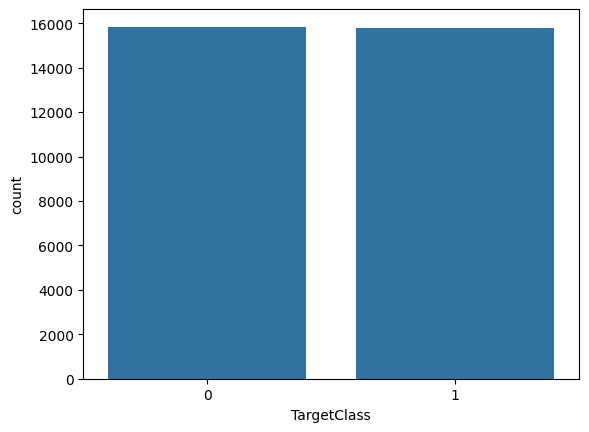

In [31]:
dft = df["TargetClass"].value_counts()
display(dft)

_ = sns.barplot(dft)

### Матрицы корреляций

In [5]:
object_cols = df.select_dtypes(include=['object']).columns
df_numeric = df.drop(object_cols, axis=1)

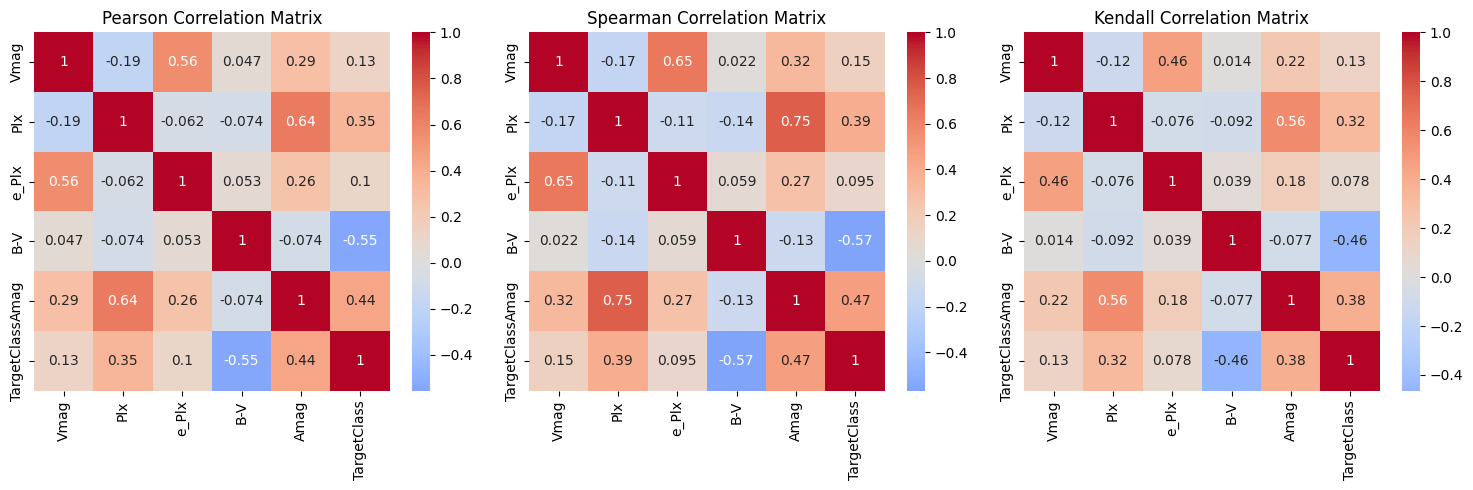

In [35]:
# Создание корреляционных матриц
pearson_corr = df_numeric.corr(method='pearson')
spearman_corr = df_numeric.corr(method='spearman')
kendall_corr = df_numeric.corr(method='kendall')

# Визуализация корреляционных матриц
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0, ax=ax[0])
ax[0].set_title('Pearson Correlation Matrix')

sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0, ax=ax[1])
ax[1].set_title('Spearman Correlation Matrix')

sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', center=0, ax=ax[2])
ax[2].set_title('Kendall Correlation Matrix')

fig.tight_layout()

### Графики парных зависимостей

In [44]:
df["SpType"].nunique()

1842

/home/andredon/ADA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/andredon/ADA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/andredon/ADA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/andredon/ADA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/andredon/ADA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.p

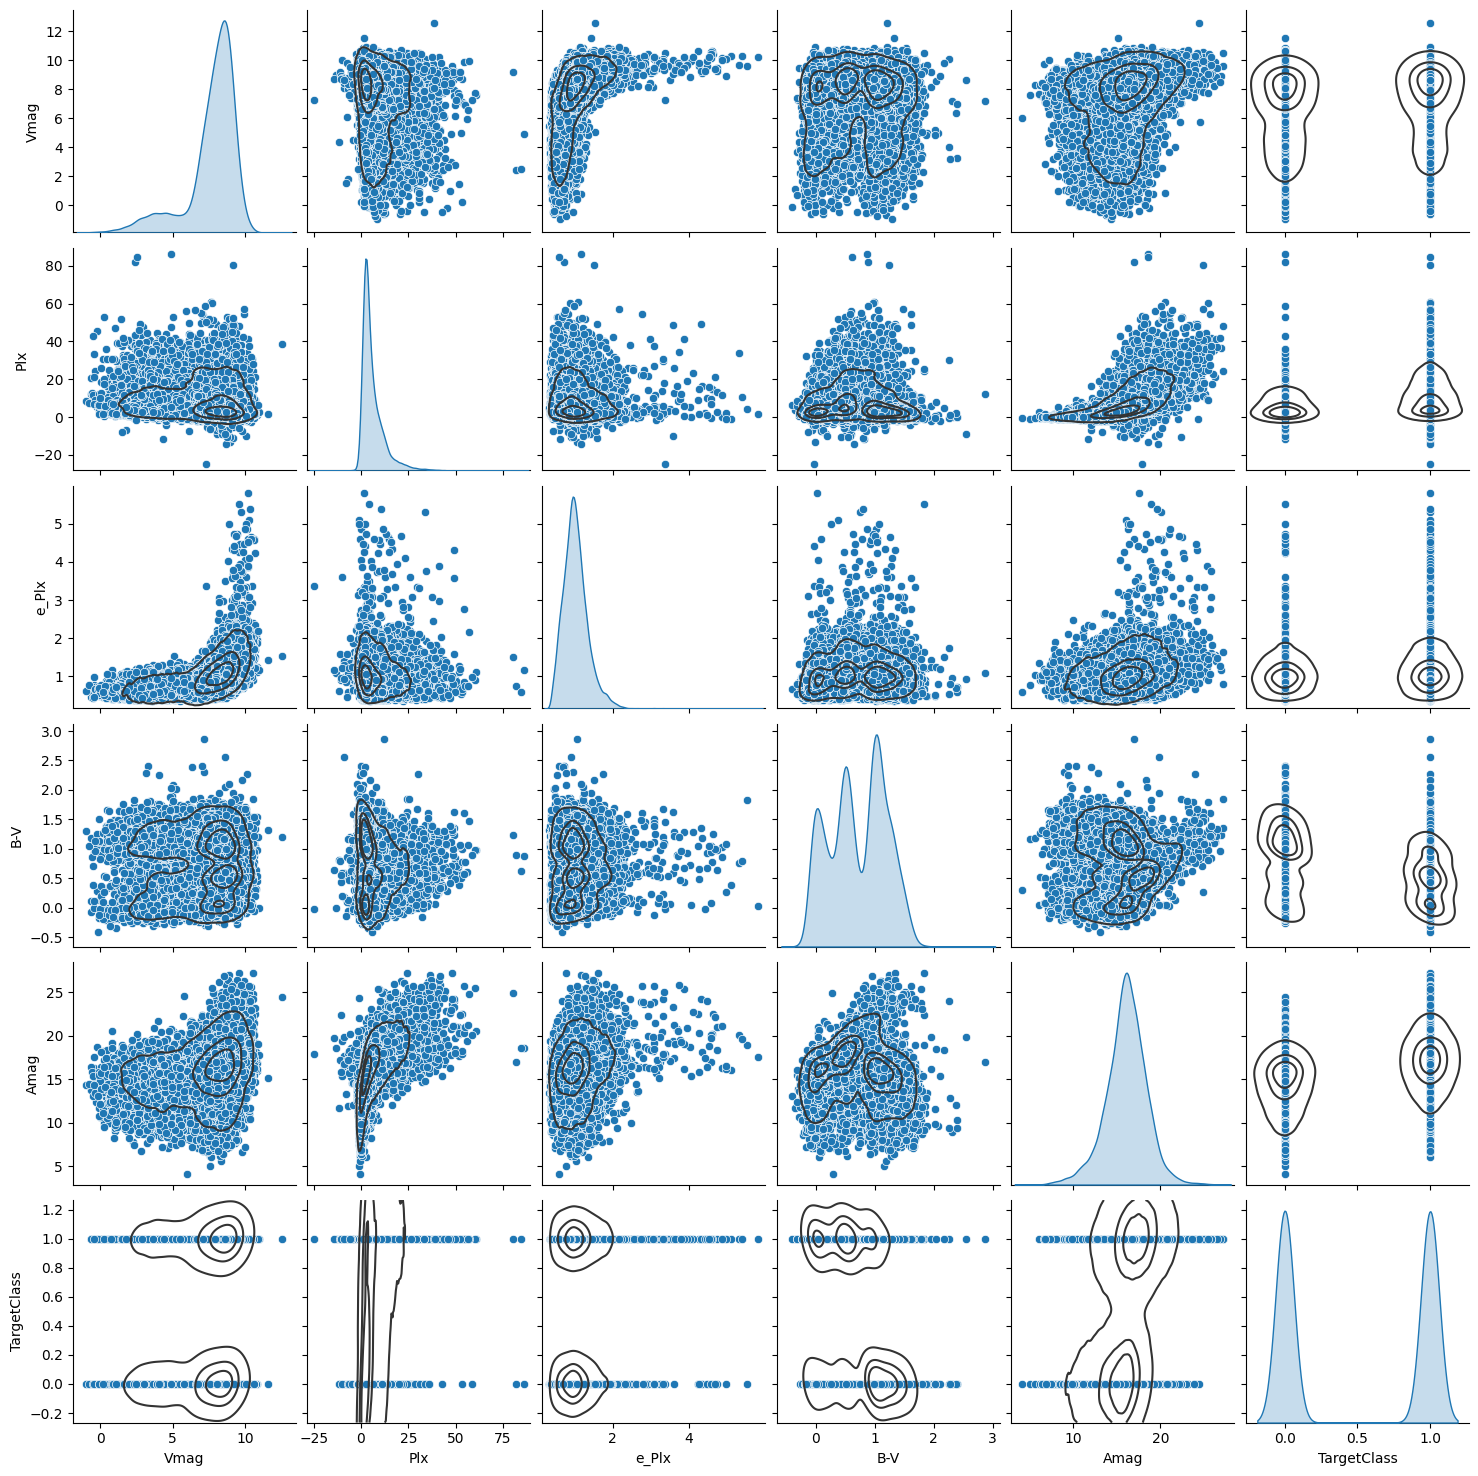

In [55]:
g = sns.pairplot(df, diag_kind="kde")
g.map(sns.kdeplot, levels=4, color=".2")

### График распределения

/home/andredon/ADA/.venv/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6617: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
/home/andredon/ADA/.venv/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6617: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
/home/andredon/ADA/.venv/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6617: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
/home/andredon/ADA/.venv/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/home/andredon/ADA/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/andredon/ADA/.venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure

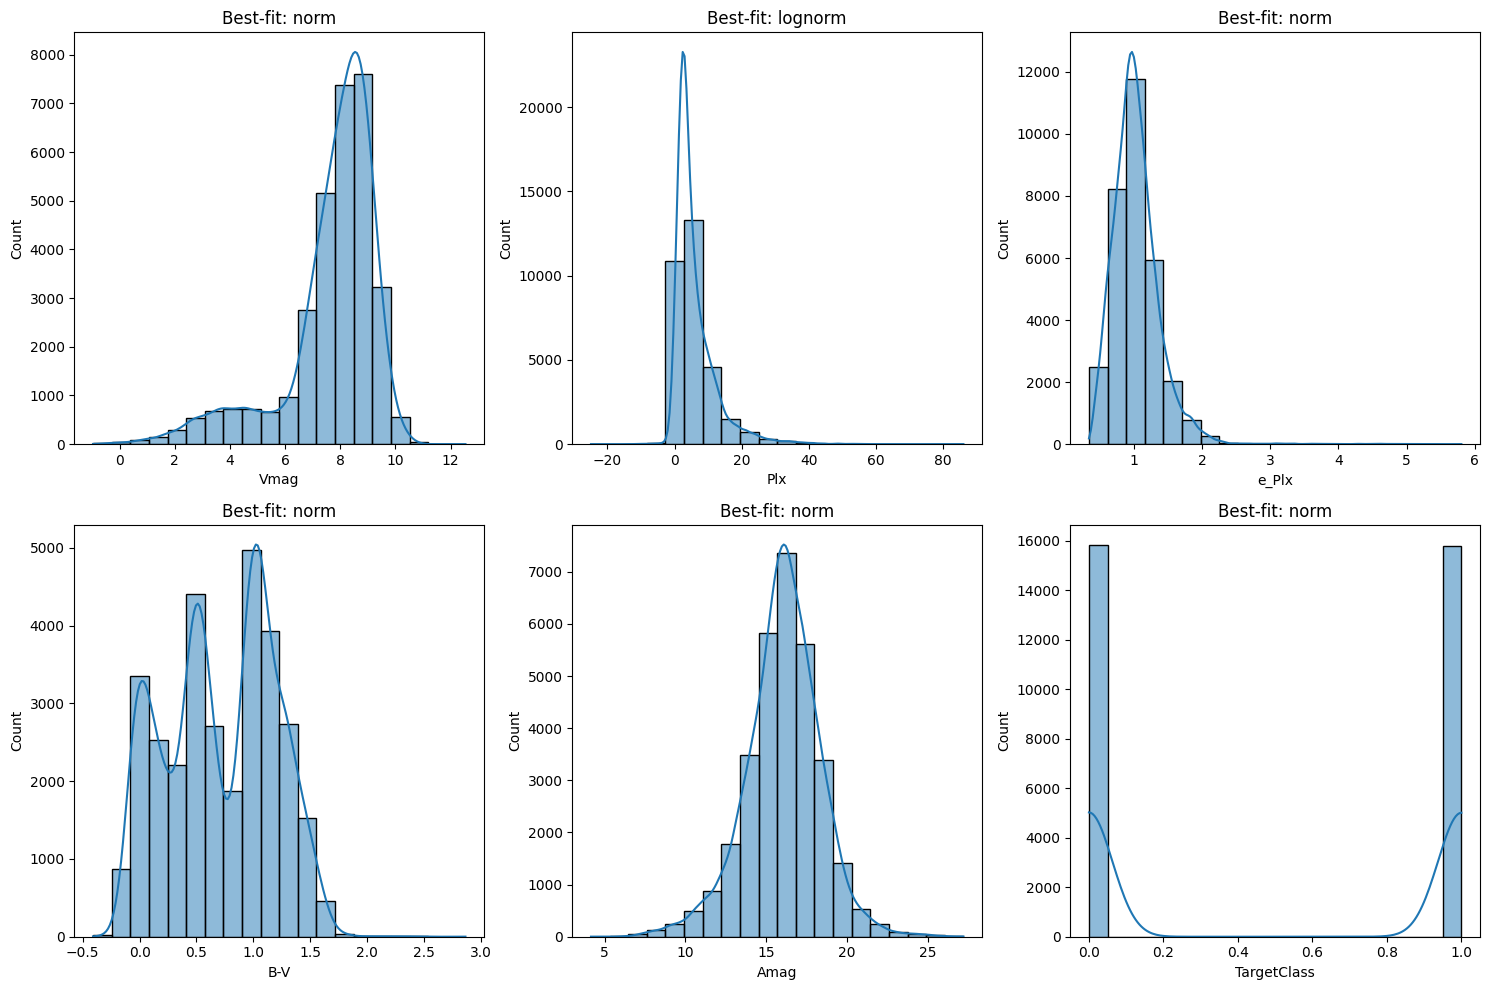

In [37]:
import numpy as np
from scipy import stats

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot histograms with KDE and determine best-fit distribution
for i, ax in enumerate(axes.flat):
    X = df_numeric.iloc[:, i]
    sns.histplot(X, kde=True, bins=20, ax=ax) 
    
    # Determine best-fit distribution
    dist_names = ['norm', 'expon', 'gamma', 'lognorm']
    best_fit_name, best_fit_params = None, None
    best_fit = 0
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        params = dist.fit(X)
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
        pdf = dist.pdf(X, loc=loc, scale=scale, *arg)
        sse = np.sum(np.power(X - pdf, 2.0))
        if best_fit == 0 or sse < best_fit:
            best_fit = sse
            best_fit_name = dist_name
            best_fit_params = params

    ax.set_title(f"Best-fit: {best_fit_name}")

fig.tight_layout()


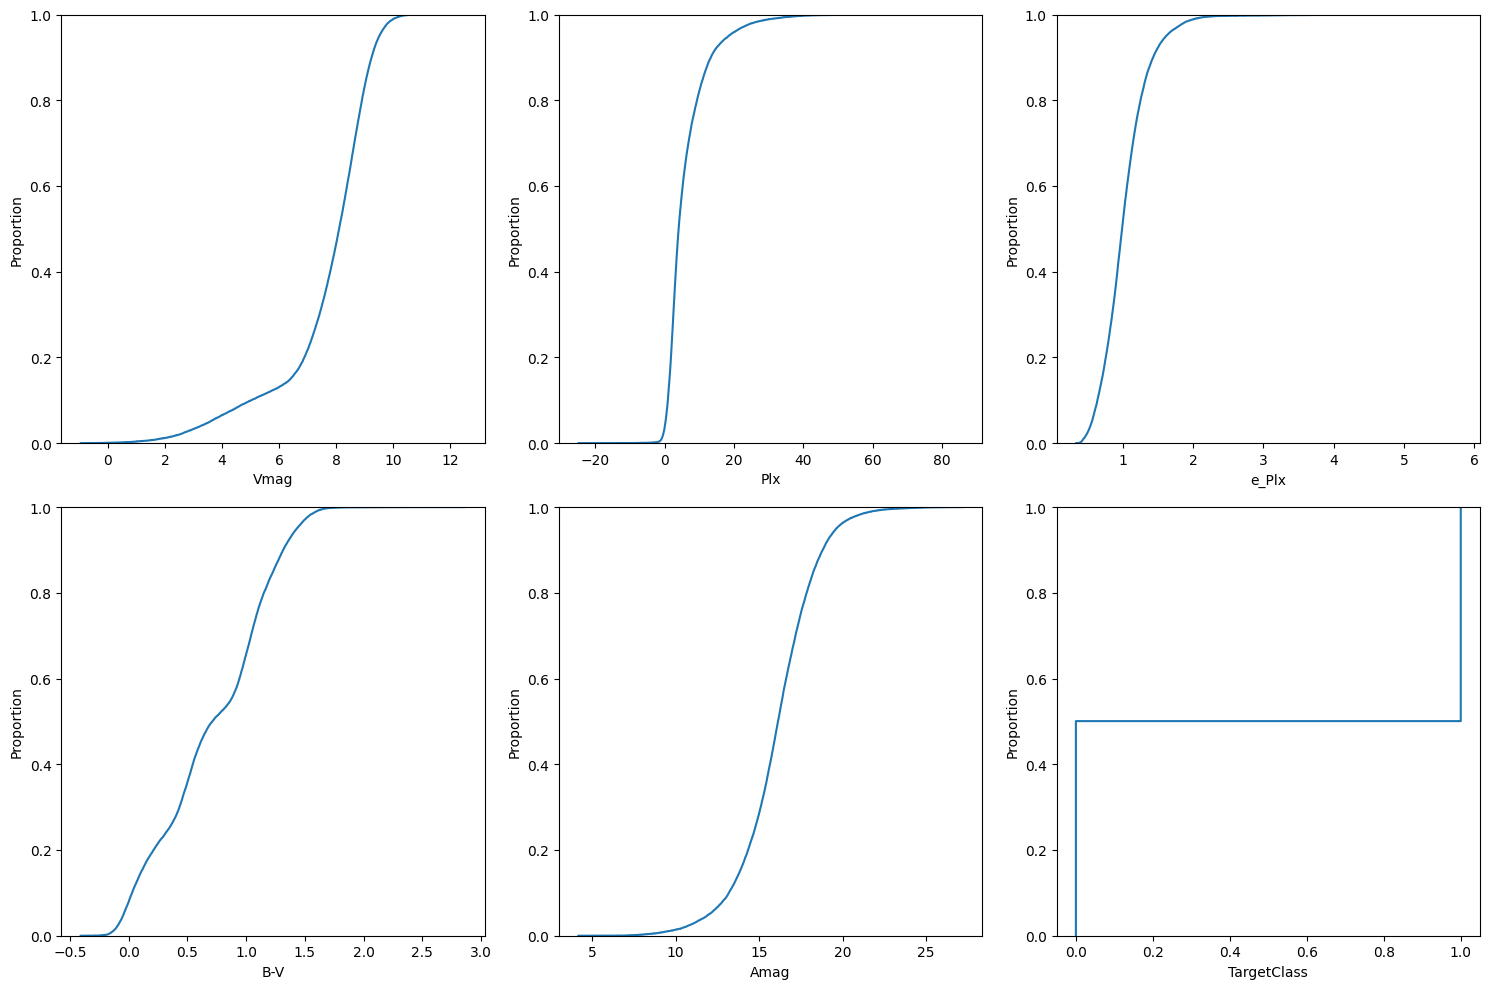

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot histograms with KDE and determine best-fit distribution
for i, ax in enumerate(axes.flat):
    X = df_numeric.iloc[:, i]
    sns.ecdfplot(x=X, ax=ax)

fig.tight_layout()

AttributeError: module 'seaborn' has no attribute 'pplot'

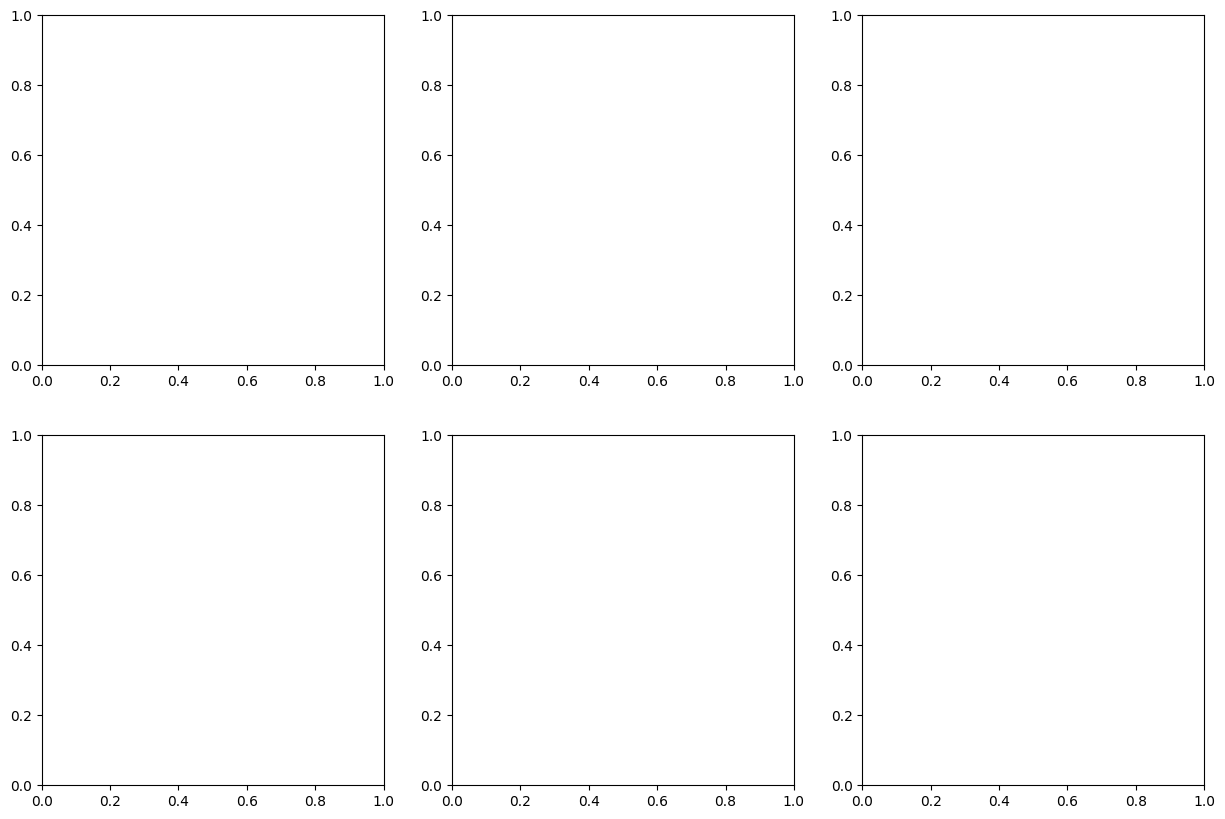

In [6]:
# QQ-plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    X = df_numeric.iloc[:, i]
    sns.pplot(x=X, ax=ax, kind='qq')

fig.tight_layout()

## Вариант 2

**Задания:**
1. Постройте Диаграмму разброса (точечный график) от двух переменных: `age` и `balance`.
2. Построить график анализа пропущенных значений.
3. Построить boxplot для всех числовых переменных. График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).
4. Построить barplot по переменной `deposit`.
5. Построить матрицу корреляции для всех переменных.
6. Построить графики парных зависимостей между всеми числовыми переменными (если много переменных, возьмите только часть).
7. Построить график распределения любой переменной.

*P.s. Все графики, оси и переменные должны быть подписаны. И по графикам необходимо сделать выводы.*

**Датасет для задания называется train_var_2.csv**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train_var_2.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,57,technician,married,secondary,no,950,yes,no,cellular,9,jul,1272,1,-1,0,unknown,no
1,34,technician,single,tertiary,no,925,yes,no,cellular,13,apr,709,1,-1,0,unknown,yes
2,41,blue-collar,single,secondary,no,75,yes,no,unknown,1,jul,479,9,-1,0,unknown,yes
3,46,technician,single,tertiary,no,4414,no,no,cellular,18,aug,504,7,-1,0,unknown,yes
4,28,unknown,single,secondary,no,4465,no,no,cellular,28,jan,769,1,-1,0,unknown,yes


### Researching DF

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7813 non-null   int64 
 1   job        7813 non-null   object
 2   marital    7813 non-null   object
 3   education  7813 non-null   object
 4   default    7813 non-null   object
 5   balance    7813 non-null   int64 
 6   housing    7813 non-null   object
 7   loan       7813 non-null   object
 8   contact    7813 non-null   object
 9   day        7813 non-null   int64 
 10  month      7813 non-null   object
 11  duration   7813 non-null   int64 
 12  campaign   7813 non-null   int64 
 13  pdays      7813 non-null   int64 
 14  previous   7813 non-null   int64 
 15  poutcome   7813 non-null   object
 16  deposit    7813 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.0+ MB


### Refinering DF

In [9]:
df.isnull().mean()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

<Axes: >

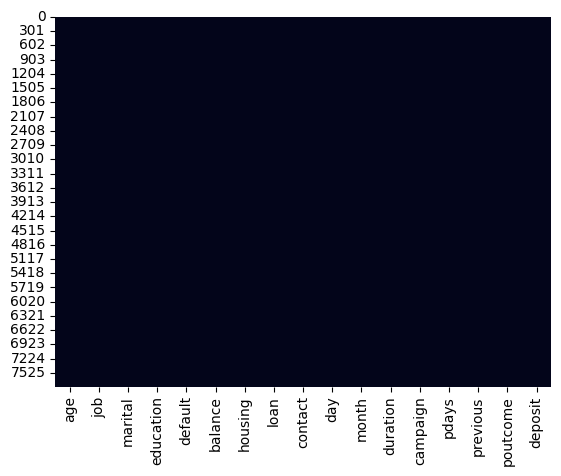

In [10]:
sns.heatmap(df.isnull(), cbar=False)

Пропущеных значений нет. Есть unknown.

### Построение диаграммы разброса

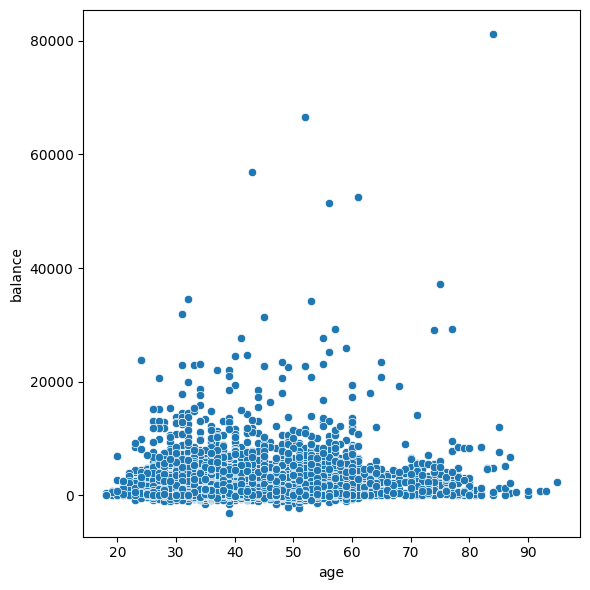

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(data=df, x="age", y="balance", ax=ax)

fig.tight_layout()

Непонятно, построем другое

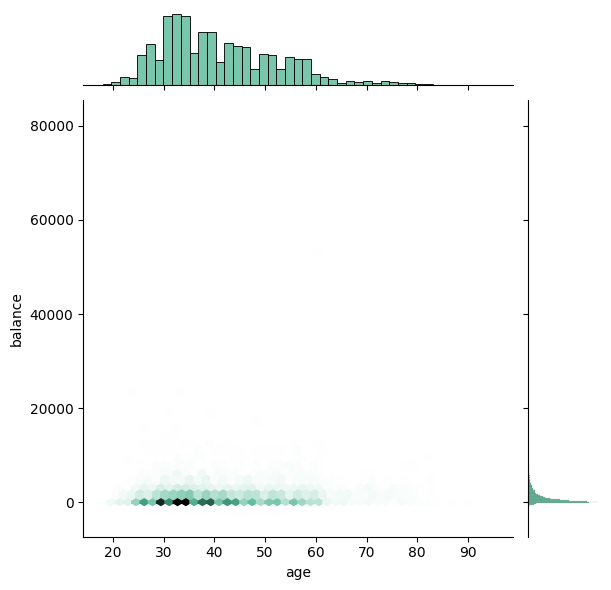

In [7]:
jg = sns.jointplot(data=df, x="age", y="balance", kind="hex", color="#4CB391", )

### График анализа пропущенных значений.

In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<Axes: >

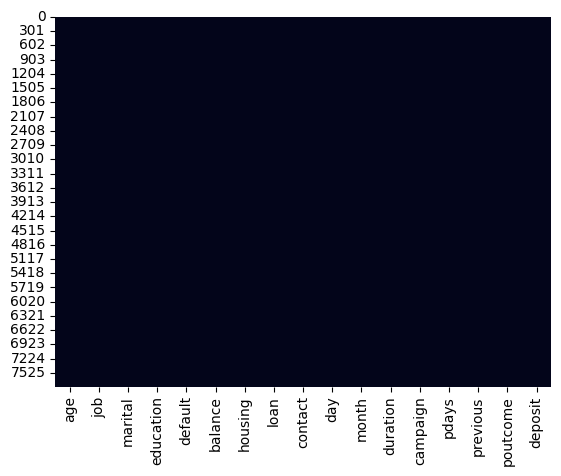

In [4]:
sns.heatmap(df.isnull(), cbar=False)

Непонятно, что нужно добится этим заданием, если команда `df.isnull().sum()` уже все говорит.

### Построить boxplot для всех числовых переменных.
График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.237169,1536.787278,15.605273,369.986433,2.499552,49.952643,0.802253
std,11.850243,3215.999050,8.419817,345.882463,2.722798,107.826919,2.135139
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,124.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,553.000000,15.000000,253.000000,2.000000,-1.000000,0.000000
75%,49.000000,1730.000000,21.000000,492.000000,3.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,41.000000


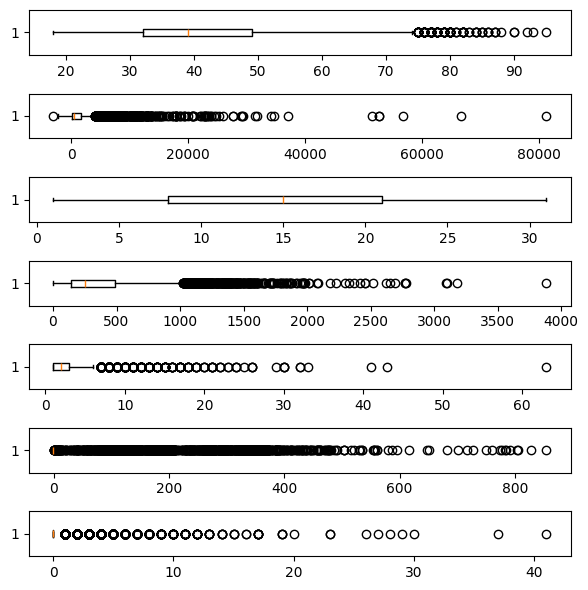

In [12]:
fig, ax = plt.subplots(7, 1, figsize=(6, 6))

for k, var in enumerate(["age", "balance", "day", "duration", "campaign", "pdays", "previous"]):
    ax[k].boxplot(df[var], vert=False)

fig.tight_layout()

Хотя boxplot и полезен, но в некоторых случаях использовать его не имеет смысла. Например `previous`.

### Построить barplot по переменной `deposit`

deposit
no     4131
yes    3682
Name: count, dtype: int64

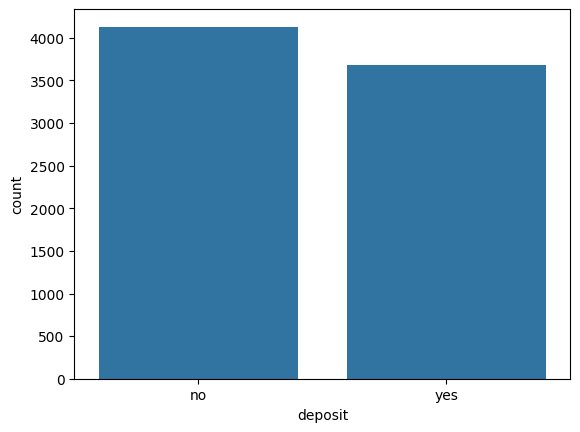

In [3]:
dft = df["deposit"].value_counts()
display(dft)dft = df["deposit"].value_counts()
display(dft)

_ = sns.barplot(dft)

_ = sns.barplot(dft)

## Вариант 3

**Задания:**
1. Постройте Диаграмму разброса (точечный график) от двух переменных: `MinTemp` и `MaxTemp`.
2. Построить график анализа пропущенных значений.
3. Построить boxplot для всех числовых переменных. График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).
4. Построить barplot по переменной `RainTomorrow`.
5. Построить матрицу корреляции для всех переменных.
6. Построить графики парных зависимостей между всеми числовыми переменными (если много переменных, возьмите только часть).
7. Построить график распределения любой переменной.

*P.s. Все графики, оси и переменные должны быть подписаны. И по графикам необходимо сделать выводы.*

**Датасет для задания называется train_var_3.csv**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv()
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Brisbane,13.7,23.6,0.0,5.0,9.6,SSE,24.0,SSW,ESE,...,65.0,53.0,1028.4,1026.7,1.0,1.0,18.3,22.3,0,0
1,Sydney,15.4,21.2,61.2,5.8,2.7,S,43.0,WSW,SSW,...,91.0,65.0,1018.8,1016.5,8.0,7.0,15.6,20.7,1,1
2,Richmond,16.8,30.9,1.0,NaN,NaN,NE,35.0,NNW,NE,...,80.0,38.0,1020.4,1013.2,1.0,NaN,19.6,30.0,0,0
3,NorfolkIsland,13.9,17.1,0.2,3.8,8.9,SE,37.0,SE,SSE,...,56.0,63.0,1027.7,1026.1,3.0,1.0,15.3,15.8,0,0
4,Mildura,16.0,36.1,0.0,6.8,12.9,ENE,33.0,ENE,E,...,58.0,32.0,1018.5,1016.0,0.0,3.0,26.0,34.9,0,0
